# <u>Individual Assignment, Eugen Wettstein
## Image Classification

# <u>Connecting to the Drive and change of path</u>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/drive/My\ Drive/C-Elegans

/content/drive/My Drive/C-Elegans


# <u>Best result that I got using as activation function INTER_NEAREST</u>
When using the activation function INTER_NEAREST I managed to get an accuracy of 79%

# <u> Defining the function to read the data

In [ ]:
def prep_data (folder,percent):
    # iterate through folders, assembling feature, label, and classname data objects
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    import cv2
    import math

    class_id = 0
    features = []
    labels = np.array([])
    classnames = []
    for root, dirs, filenames in os.walk(folder):
        for d in sorted(dirs):
            print("Reading data from", d)
            # use the folder name as the class name for this label
            classnames.append(d)
            files = os.listdir(os.path.join(root,d))
            for f in files:
                # Load the image file
                imgFile = os.path.join(root,d, f)
                img = plt.imread(imgFile)
                scale_percent = percent # percent of original size
                width = int(img.shape[1] * scale_percent / 100)
                height = int(img.shape[0] * scale_percent / 100)
                dim = (width, height)
                # resize image
                resized = cv2.resize(img, dim, interpolation = cv2.INTER_NEAREST)
                #sobel edge detection
                sobelx = cv2.Sobel(resized,cv2.CV_64F,1,0,ksize=5)
                sobely = cv2.Sobel(resized,cv2.CV_64F,0,1,ksize=5)
                #print(sobelx.type)
                #magniture
                sobel=np.sqrt(np.multiply(sobelx,sobelx)+np.multiply(sobely,sobely))
                vis = np.concatenate((resized, sobel), axis=0)

                # The image array is a multidimensional numpy array
                # - flatten it to a single array of pixel values for scikit-learn
                # - and add it to the list of features
                #features.append(vis.ravel())
                features.append(sobel.ravel())
                
                # Add it to the numpy array of labels
                labels = np.append(labels, class_id )
            class_id  += 1
            
    # Convert the list of features into a numpy array
    features = np.array(features)
    
    return features, labels, classnames


# The images are in a folder named 'shapes/training'
training_folder_name = 'Training'

# Prepare the image data
features, labels, classnames = prep_data(training_folder_name,60)
print(len(features), 'features')
print(len(labels), 'labels')
print(len(classnames), 'classes:', classnames)

Reading data from Alive
Reading data from Dead
140 features
140 labels
2 classes: ['Alive', 'Dead']


# <u>Checking for percentage scale</u>
First we will check which percentage for the image is the one that works best. I did this step for both activation functions and having an 31% for INTER_AREA and 54% for INTER_NEAREST.

Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 30
              precision    recall  f1-score   support

       Alive       0.62      0.67      0.64        24
        Dead       0.50      0.44      0.47        18

    accuracy                           0.57        42
   macro avg       0.56      0.56      0.56        42
weighted avg       0.57      0.57      0.57        42

Accuracy: 57.14%

 Confusion Matrix:


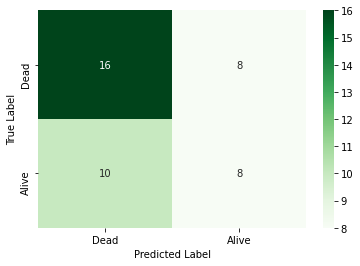

Percentage: 30
              precision    recall  f1-score   support

       Alive       0.67      0.67      0.67        24
        Dead       0.56      0.56      0.56        18

    accuracy                           0.62        42
   macro avg       0.61      0.61      0.61        42
weighted avg       0.62      0.62      0.62        42

Accuracy: 61.90%

 Confusion Matrix:


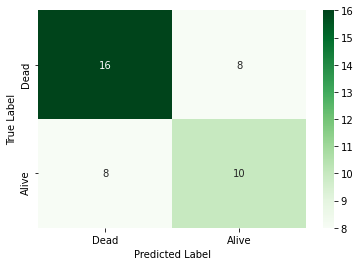

   Percentage  Accuracy    Scaler
2          30      0.62     Power
1          30      0.57  Standard
0           0      0.00       set
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 31
              precision    recall  f1-score   support

       Alive       0.64      0.91      0.75        23
        Dead       0.78      0.37      0.50        19

    accuracy                           0.67        42
   macro avg       0.71      0.64      0.62        42
weighted avg       0.70      0.67      0.64        42

Accuracy: 66.67%

 Confusion Matrix:


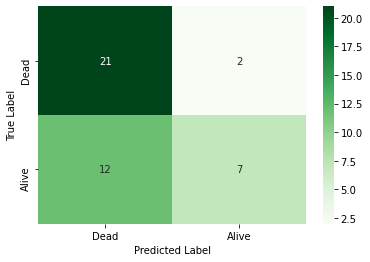

Percentage: 31
              precision    recall  f1-score   support

       Alive       0.61      0.83      0.70        23
        Dead       0.64      0.37      0.47        19

    accuracy                           0.62        42
   macro avg       0.62      0.60      0.59        42
weighted avg       0.62      0.62      0.60        42

Accuracy: 61.90%

 Confusion Matrix:


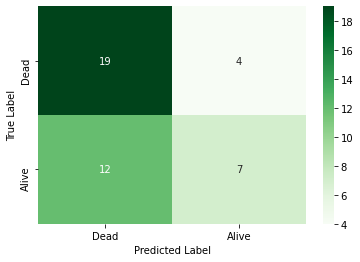

   Percentage  Accuracy    Scaler
3          31      0.67  Standard
2          30      0.62     Power
4          31      0.62     Power
1          30      0.57  Standard
0           0      0.00       set
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 32
              precision    recall  f1-score   support

       Alive       0.58      0.70      0.64        20
        Dead       0.67      0.55      0.60        22

    accuracy                           0.62        42
   macro avg       0.62      0.62      0.62        42
weighted avg       0.63      0.62      0.62        42

Accuracy: 61.90%

 Confusion Matrix:


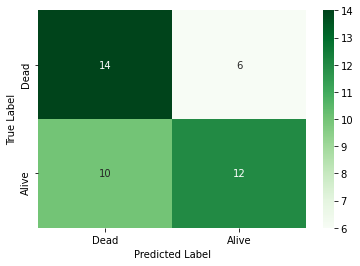

Percentage: 32
              precision    recall  f1-score   support

       Alive       0.62      0.80      0.70        20
        Dead       0.75      0.55      0.63        22

    accuracy                           0.67        42
   macro avg       0.68      0.67      0.66        42
weighted avg       0.69      0.67      0.66        42

Accuracy: 66.67%

 Confusion Matrix:


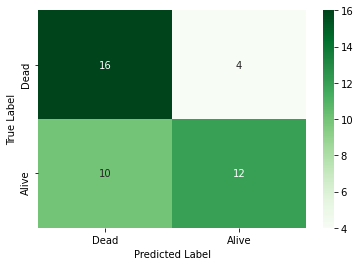

   Percentage  Accuracy    Scaler
3          31      0.67  Standard
6          32      0.67     Power
2          30      0.62     Power
4          31      0.62     Power
5          32      0.62  Standard
1          30      0.57  Standard
0           0      0.00       set
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 33
              precision    recall  f1-score   support

       Alive       0.55      0.63      0.59        19
        Dead       0.65      0.57      0.60        23

    accuracy                           0.60        42
   macro avg       0.60      0.60      0.60        42
weighted avg       0.60      0.60      0.60        42

Accuracy: 59.52%

 Confusion Matrix:


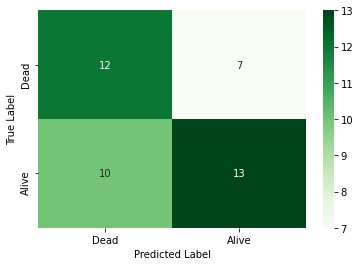

Percentage: 33
              precision    recall  f1-score   support

       Alive       0.43      0.47      0.45        19
        Dead       0.52      0.48      0.50        23

    accuracy                           0.48        42
   macro avg       0.48      0.48      0.47        42
weighted avg       0.48      0.48      0.48        42

Accuracy: 47.62%

 Confusion Matrix:


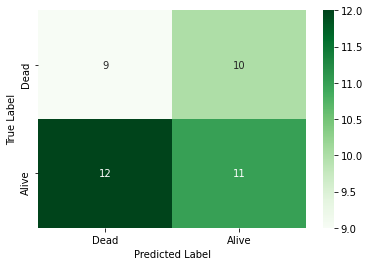

   Percentage  Accuracy    Scaler
3          31      0.67  Standard
6          32      0.67     Power
2          30      0.62     Power
4          31      0.62     Power
5          32      0.62  Standard
7          33      0.60  Standard
1          30      0.57  Standard
8          33      0.48     Power
0           0      0.00       set
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 34
              precision    recall  f1-score   support

       Alive       0.58      0.78      0.67        18
        Dead       0.78      0.58      0.67        24

    accuracy                           0.67        42
   macro avg       0.68      0.68      0.67        42
weighted avg       0.69      0.67      0.67        42

Accuracy: 66.67%

 Confusion Matrix:


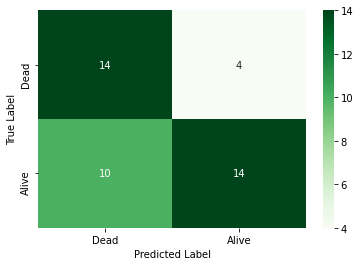

Percentage: 34
              precision    recall  f1-score   support

       Alive       0.54      0.78      0.64        18
        Dead       0.75      0.50      0.60        24

    accuracy                           0.62        42
   macro avg       0.64      0.64      0.62        42
weighted avg       0.66      0.62      0.62        42

Accuracy: 61.90%

 Confusion Matrix:


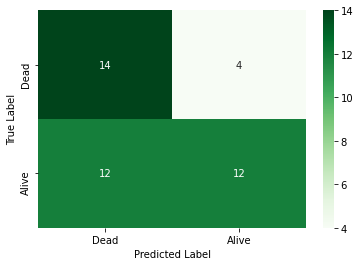

    Percentage  Accuracy    Scaler
3           31      0.67  Standard
6           32      0.67     Power
9           34      0.67  Standard
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
10          34      0.62     Power
7           33      0.60  Standard
1           30      0.57  Standard
8           33      0.48     Power
0            0      0.00       set
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 35
              precision    recall  f1-score   support

       Alive       0.60      0.71      0.65        21
        Dead       0.65      0.52      0.58        21

    accuracy                           0.62        42
   macro avg       0.62      0.62      0.62        42
weighted avg       0.62      0.62      0.62        42

Accuracy: 61.90%

 Confusion Matrix:


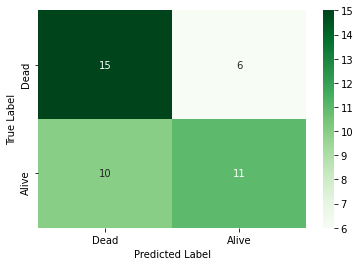

Percentage: 35
              precision    recall  f1-score   support

       Alive       0.56      0.71      0.63        21
        Dead       0.60      0.43      0.50        21

    accuracy                           0.57        42
   macro avg       0.58      0.57      0.56        42
weighted avg       0.58      0.57      0.56        42

Accuracy: 57.14%

 Confusion Matrix:


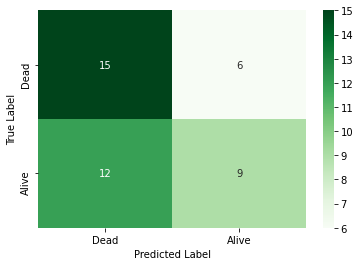

    Percentage  Accuracy    Scaler
3           31      0.67  Standard
6           32      0.67     Power
9           34      0.67  Standard
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
10          34      0.62     Power
11          35      0.62  Standard
7           33      0.60  Standard
1           30      0.57  Standard
12          35      0.57     Power
8           33      0.48     Power
0            0      0.00       set
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 36
              precision    recall  f1-score   support

       Alive       0.57      0.52      0.55        23
        Dead       0.48      0.53      0.50        19

    accuracy                           0.52        42
   macro avg       0.52      0.52      0.52        42
weighted avg       0.53      0.52      0.52        42

Accuracy: 52.38%

 Confusion Matrix:


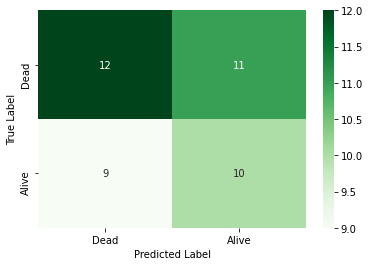

Percentage: 36
              precision    recall  f1-score   support

       Alive       0.57      0.52      0.55        23
        Dead       0.48      0.53      0.50        19

    accuracy                           0.52        42
   macro avg       0.52      0.52      0.52        42
weighted avg       0.53      0.52      0.52        42

Accuracy: 52.38%

 Confusion Matrix:


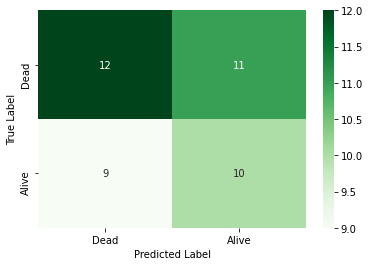

    Percentage  Accuracy    Scaler
3           31      0.67  Standard
6           32      0.67     Power
9           34      0.67  Standard
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
10          34      0.62     Power
11          35      0.62  Standard
7           33      0.60  Standard
1           30      0.57  Standard
12          35      0.57     Power
13          36      0.52  Standard
14          36      0.52     Power
8           33      0.48     Power
0            0      0.00       set
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 37
              precision    recall  f1-score   support

       Alive       0.67      0.52      0.59        23
        Dead       0.54      0.68      0.60        19

    accuracy                           0.60        42
   macro avg       0.60      0.60      0.60        42
weighted avg       0.61      0.60      0.59        42

Accuracy: 59.52%

 Confusion Matrix:


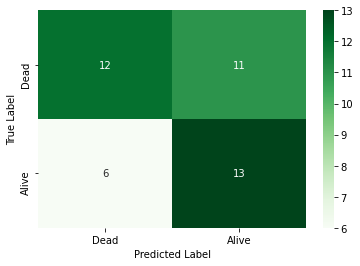

Percentage: 37
              precision    recall  f1-score   support

       Alive       0.56      0.39      0.46        23
        Dead       0.46      0.63      0.53        19

    accuracy                           0.50        42
   macro avg       0.51      0.51      0.50        42
weighted avg       0.52      0.50      0.49        42

Accuracy: 50.00%

 Confusion Matrix:


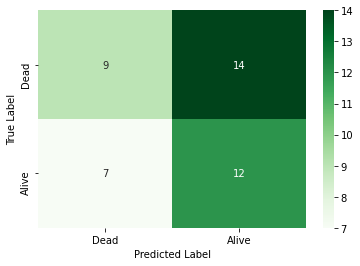

    Percentage  Accuracy    Scaler
3           31      0.67  Standard
6           32      0.67     Power
9           34      0.67  Standard
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
10          34      0.62     Power
11          35      0.62  Standard
15          37      0.60  Standard
7           33      0.60  Standard
1           30      0.57  Standard
12          35      0.57     Power
13          36      0.52  Standard
14          36      0.52     Power
16          37      0.50     Power
8           33      0.48     Power
0            0      0.00       set
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 38
              precision    recall  f1-score   support

       Alive       0.52      0.57      0.55        21
        Dead       0.53      0.48      0.50        21

    accuracy                           0.52        42
   macro avg       0.52      0.52      0.52        42
weighted avg       0.52      0.52      0.52        42

Accuracy: 52.38%

 Confusion Matrix:


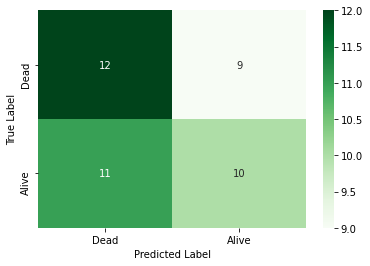

Percentage: 38
              precision    recall  f1-score   support

       Alive       0.50      0.48      0.49        21
        Dead       0.50      0.52      0.51        21

    accuracy                           0.50        42
   macro avg       0.50      0.50      0.50        42
weighted avg       0.50      0.50      0.50        42

Accuracy: 50.00%

 Confusion Matrix:


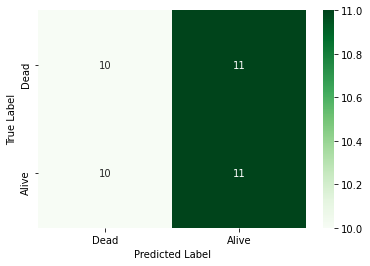

    Percentage  Accuracy    Scaler
9           34      0.67  Standard
3           31      0.67  Standard
6           32      0.67     Power
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
10          34      0.62     Power
11          35      0.62  Standard
7           33      0.60  Standard
15          37      0.60  Standard
1           30      0.57  Standard
12          35      0.57     Power
17          38      0.52  Standard
13          36      0.52  Standard
14          36      0.52     Power
16          37      0.50     Power
18          38      0.50     Power
8           33      0.48     Power
0            0      0.00       set
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 39
              precision    recall  f1-score   support

       Alive       0.52      0.62      0.57        21
        Dead       0.53      0.43      0.47        21

    accuracy                           0.52        42
   macro avg       0.52      0.52      0.52        42
weighted avg       0.52      0.52      0.52        42

Accuracy: 52.38%

 Confusion Matrix:


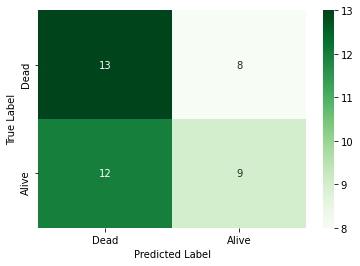

Percentage: 39
              precision    recall  f1-score   support

       Alive       0.52      0.67      0.58        21
        Dead       0.53      0.38      0.44        21

    accuracy                           0.52        42
   macro avg       0.53      0.52      0.51        42
weighted avg       0.53      0.52      0.51        42

Accuracy: 52.38%

 Confusion Matrix:


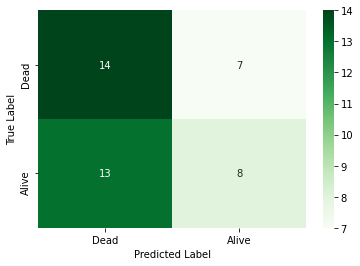

    Percentage  Accuracy    Scaler
3           31      0.67  Standard
6           32      0.67     Power
9           34      0.67  Standard
10          34      0.62     Power
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
11          35      0.62  Standard
15          37      0.60  Standard
7           33      0.60  Standard
1           30      0.57  Standard
12          35      0.57     Power
19          39      0.52  Standard
17          38      0.52  Standard
20          39      0.52     Power
14          36      0.52     Power
13          36      0.52  Standard
16          37      0.50     Power
18          38      0.50     Power
8           33      0.48     Power
0            0      0.00       set
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 40
              precision    recall  f1-score   support

       Alive       0.33      0.43      0.38        14
        Dead       0.67      0.57      0.62        28

    accuracy                           0.52        42
   macro avg       0.50      0.50      0.50        42
weighted avg       0.56      0.52      0.54        42

Accuracy: 52.38%

 Confusion Matrix:


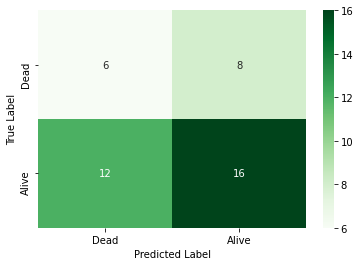

Percentage: 40
              precision    recall  f1-score   support

       Alive       0.26      0.36      0.30        14
        Dead       0.61      0.50      0.55        28

    accuracy                           0.45        42
   macro avg       0.44      0.43      0.43        42
weighted avg       0.49      0.45      0.47        42

Accuracy: 45.24%

 Confusion Matrix:


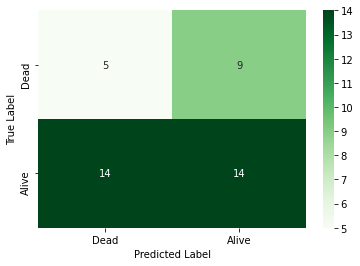

    Percentage  Accuracy    Scaler
9           34      0.67  Standard
3           31      0.67  Standard
6           32      0.67     Power
11          35      0.62  Standard
5           32      0.62  Standard
10          34      0.62     Power
4           31      0.62     Power
2           30      0.62     Power
7           33      0.60  Standard
15          37      0.60  Standard
1           30      0.57  Standard
12          35      0.57     Power
21          40      0.52  Standard
13          36      0.52  Standard
14          36      0.52     Power
17          38      0.52  Standard
19          39      0.52  Standard
20          39      0.52     Power
16          37      0.50     Power
18          38      0.50     Power
8           33      0.48     Power
22          40      0.45     Power
0            0      0.00       set
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 41
              precision    recall  f1-score   support

       Alive       0.57      0.60      0.59        20
        Dead       0.62      0.59      0.60        22

    accuracy                           0.60        42
   macro avg       0.60      0.60      0.60        42
weighted avg       0.60      0.60      0.60        42

Accuracy: 59.52%

 Confusion Matrix:


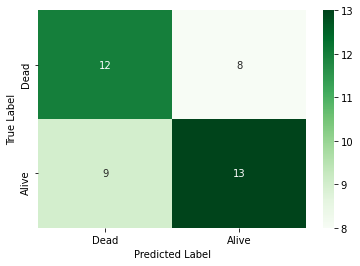

Percentage: 41
              precision    recall  f1-score   support

       Alive       0.53      0.50      0.51        20
        Dead       0.57      0.59      0.58        22

    accuracy                           0.55        42
   macro avg       0.55      0.55      0.55        42
weighted avg       0.55      0.55      0.55        42

Accuracy: 54.76%

 Confusion Matrix:


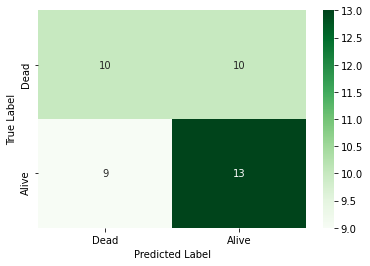

    Percentage  Accuracy    Scaler
3           31      0.67  Standard
6           32      0.67     Power
9           34      0.67  Standard
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
10          34      0.62     Power
11          35      0.62  Standard
15          37      0.60  Standard
7           33      0.60  Standard
23          41      0.60  Standard
12          35      0.57     Power
1           30      0.57  Standard
24          41      0.55     Power
14          36      0.52     Power
13          36      0.52  Standard
17          38      0.52  Standard
19          39      0.52  Standard
20          39      0.52     Power
21          40      0.52  Standard
16          37      0.50     Power
18          38      0.50     Power
8           33      0.48     Power
22          40      0.45     Power
0            0      0.00       set
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 42
              precision    recall  f1-score   support

       Alive       0.48      0.56      0.51        18
        Dead       0.62      0.54      0.58        24

    accuracy                           0.55        42
   macro avg       0.55      0.55      0.55        42
weighted avg       0.56      0.55      0.55        42

Accuracy: 54.76%

 Confusion Matrix:


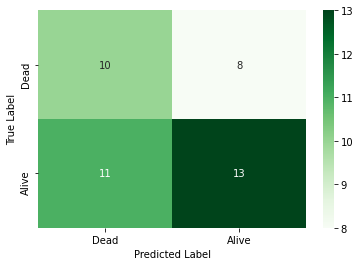

Percentage: 42
              precision    recall  f1-score   support

       Alive       0.46      0.61      0.52        18
        Dead       0.61      0.46      0.52        24

    accuracy                           0.52        42
   macro avg       0.53      0.53      0.52        42
weighted avg       0.55      0.52      0.52        42

Accuracy: 52.38%

 Confusion Matrix:


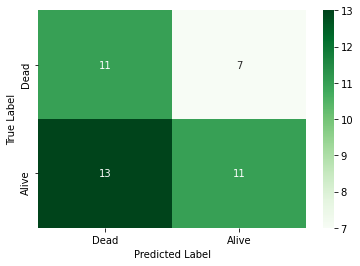

    Percentage  Accuracy    Scaler
9           34      0.67  Standard
3           31      0.67  Standard
6           32      0.67     Power
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
10          34      0.62     Power
11          35      0.62  Standard
23          41      0.60  Standard
7           33      0.60  Standard
15          37      0.60  Standard
12          35      0.57     Power
1           30      0.57  Standard
25          42      0.55  Standard
24          41      0.55     Power
21          40      0.52  Standard
13          36      0.52  Standard
19          39      0.52  Standard
20          39      0.52     Power
26          42      0.52     Power
17          38      0.52  Standard
14          36      0.52     Power
18          38      0.50     Power
16          37      0.50     Power
8           33      0.48     Power
22          40      0.45     Power
0            0      0.00       set
Reading data from Al

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 43
              precision    recall  f1-score   support

       Alive       0.42      0.42      0.42        19
        Dead       0.52      0.52      0.52        23

    accuracy                           0.48        42
   macro avg       0.47      0.47      0.47        42
weighted avg       0.48      0.48      0.48        42

Accuracy: 47.62%

 Confusion Matrix:


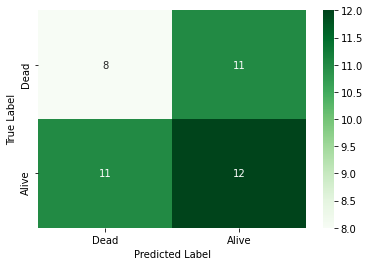

Percentage: 43
              precision    recall  f1-score   support

       Alive       0.37      0.37      0.37        19
        Dead       0.48      0.48      0.48        23

    accuracy                           0.43        42
   macro avg       0.42      0.42      0.42        42
weighted avg       0.43      0.43      0.43        42

Accuracy: 42.86%

 Confusion Matrix:


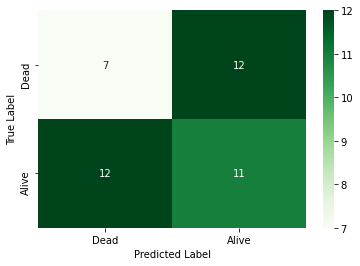

    Percentage  Accuracy    Scaler
9           34      0.67  Standard
3           31      0.67  Standard
6           32      0.67     Power
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
10          34      0.62     Power
11          35      0.62  Standard
23          41      0.60  Standard
7           33      0.60  Standard
15          37      0.60  Standard
12          35      0.57     Power
1           30      0.57  Standard
25          42      0.55  Standard
24          41      0.55     Power
21          40      0.52  Standard
14          36      0.52     Power
19          39      0.52  Standard
20          39      0.52     Power
13          36      0.52  Standard
17          38      0.52  Standard
26          42      0.52     Power
18          38      0.50     Power
16          37      0.50     Power
27          43      0.48  Standard
8           33      0.48     Power
22          40      0.45     Power
28          43      

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 44
              precision    recall  f1-score   support

       Alive       0.36      0.50      0.42        16
        Dead       0.60      0.46      0.52        26

    accuracy                           0.48        42
   macro avg       0.48      0.48      0.47        42
weighted avg       0.51      0.48      0.48        42

Accuracy: 47.62%

 Confusion Matrix:


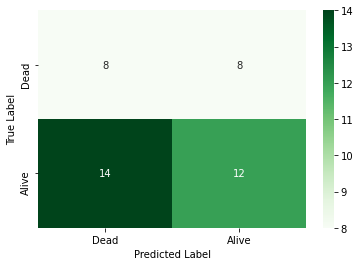

Percentage: 44
              precision    recall  f1-score   support

       Alive       0.33      0.50      0.40        16
        Dead       0.56      0.38      0.45        26

    accuracy                           0.43        42
   macro avg       0.44      0.44      0.43        42
weighted avg       0.47      0.43      0.43        42

Accuracy: 42.86%

 Confusion Matrix:


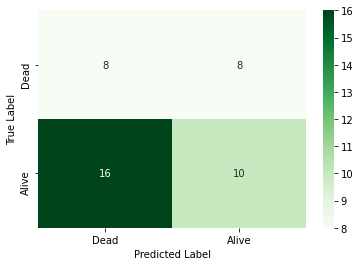

    Percentage  Accuracy    Scaler
9           34      0.67  Standard
3           31      0.67  Standard
6           32      0.67     Power
10          34      0.62     Power
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
11          35      0.62  Standard
23          41      0.60  Standard
15          37      0.60  Standard
7           33      0.60  Standard
12          35      0.57     Power
1           30      0.57  Standard
25          42      0.55  Standard
24          41      0.55     Power
19          39      0.52  Standard
26          42      0.52     Power
21          40      0.52  Standard
20          39      0.52     Power
14          36      0.52     Power
17          38      0.52  Standard
13          36      0.52  Standard
18          38      0.50     Power
16          37      0.50     Power
29          44      0.48  Standard
8           33      0.48     Power
27          43      0.48  Standard
22          40      

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 45
              precision    recall  f1-score   support

       Alive       0.52      0.55      0.54        20
        Dead       0.57      0.55      0.56        22

    accuracy                           0.55        42
   macro avg       0.55      0.55      0.55        42
weighted avg       0.55      0.55      0.55        42

Accuracy: 54.76%

 Confusion Matrix:


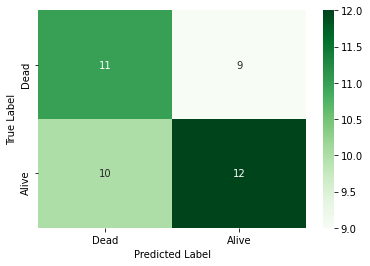

Percentage: 45
              precision    recall  f1-score   support

       Alive       0.55      0.55      0.55        20
        Dead       0.59      0.59      0.59        22

    accuracy                           0.57        42
   macro avg       0.57      0.57      0.57        42
weighted avg       0.57      0.57      0.57        42

Accuracy: 57.14%

 Confusion Matrix:


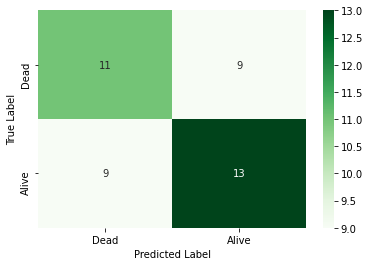

    Percentage  Accuracy    Scaler
3           31      0.67  Standard
6           32      0.67     Power
9           34      0.67  Standard
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
10          34      0.62     Power
11          35      0.62  Standard
23          41      0.60  Standard
15          37      0.60  Standard
7           33      0.60  Standard
1           30      0.57  Standard
32          45      0.57     Power
12          35      0.57     Power
24          41      0.55     Power
31          45      0.55  Standard
25          42      0.55  Standard
13          36      0.52  Standard
14          36      0.52     Power
17          38      0.52  Standard
26          42      0.52     Power
19          39      0.52  Standard
20          39      0.52     Power
21          40      0.52  Standard
16          37      0.50     Power
18          38      0.50     Power
27          43      0.48  Standard
29          44      

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 46
              precision    recall  f1-score   support

       Alive       0.41      0.45      0.43        20
        Dead       0.45      0.41      0.43        22

    accuracy                           0.43        42
   macro avg       0.43      0.43      0.43        42
weighted avg       0.43      0.43      0.43        42

Accuracy: 42.86%

 Confusion Matrix:


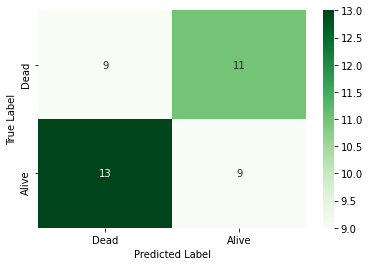

Percentage: 46
              precision    recall  f1-score   support

       Alive       0.43      0.45      0.44        20
        Dead       0.48      0.45      0.47        22

    accuracy                           0.45        42
   macro avg       0.45      0.45      0.45        42
weighted avg       0.45      0.45      0.45        42

Accuracy: 45.24%

 Confusion Matrix:


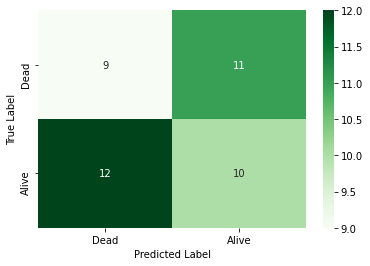

    Percentage  Accuracy    Scaler
3           31      0.67  Standard
6           32      0.67     Power
9           34      0.67  Standard
10          34      0.62     Power
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
11          35      0.62  Standard
15          37      0.60  Standard
7           33      0.60  Standard
23          41      0.60  Standard
32          45      0.57     Power
1           30      0.57  Standard
12          35      0.57     Power
31          45      0.55  Standard
24          41      0.55     Power
25          42      0.55  Standard
20          39      0.52     Power
26          42      0.52     Power
21          40      0.52  Standard
17          38      0.52  Standard
19          39      0.52  Standard
13          36      0.52  Standard
14          36      0.52     Power
18          38      0.50     Power
16          37      0.50     Power
29          44      0.48  Standard
8           33      

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 47
              precision    recall  f1-score   support

       Alive       0.55      0.60      0.57        20
        Dead       0.60      0.55      0.57        22

    accuracy                           0.57        42
   macro avg       0.57      0.57      0.57        42
weighted avg       0.57      0.57      0.57        42

Accuracy: 57.14%

 Confusion Matrix:


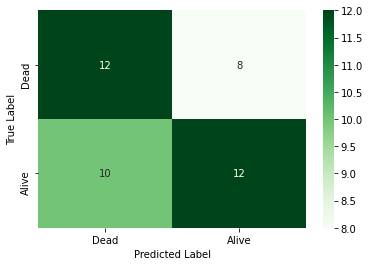

Percentage: 47
              precision    recall  f1-score   support

       Alive       0.50      0.55      0.52        20
        Dead       0.55      0.50      0.52        22

    accuracy                           0.52        42
   macro avg       0.53      0.53      0.52        42
weighted avg       0.53      0.52      0.52        42

Accuracy: 52.38%

 Confusion Matrix:


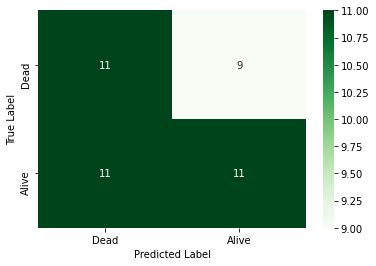

    Percentage  Accuracy    Scaler
3           31      0.67  Standard
6           32      0.67     Power
9           34      0.67  Standard
10          34      0.62     Power
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
11          35      0.62  Standard
7           33      0.60  Standard
23          41      0.60  Standard
15          37      0.60  Standard
32          45      0.57     Power
35          47      0.57  Standard
1           30      0.57  Standard
12          35      0.57     Power
31          45      0.55  Standard
25          42      0.55  Standard
24          41      0.55     Power
20          39      0.52     Power
21          40      0.52  Standard
36          47      0.52     Power
19          39      0.52  Standard
17          38      0.52  Standard
14          36      0.52     Power
26          42      0.52     Power
13          36      0.52  Standard
18          38      0.50     Power
16          37      

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 48
              precision    recall  f1-score   support

       Alive       0.63      0.63      0.63        19
        Dead       0.70      0.70      0.70        23

    accuracy                           0.67        42
   macro avg       0.66      0.66      0.66        42
weighted avg       0.67      0.67      0.67        42

Accuracy: 66.67%

 Confusion Matrix:


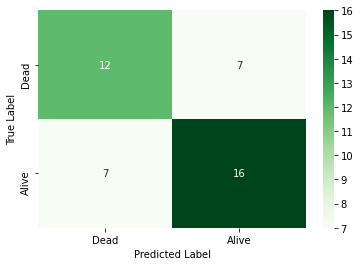

Percentage: 48
              precision    recall  f1-score   support

       Alive       0.50      0.47      0.49        19
        Dead       0.58      0.61      0.60        23

    accuracy                           0.55        42
   macro avg       0.54      0.54      0.54        42
weighted avg       0.55      0.55      0.55        42

Accuracy: 54.76%

 Confusion Matrix:


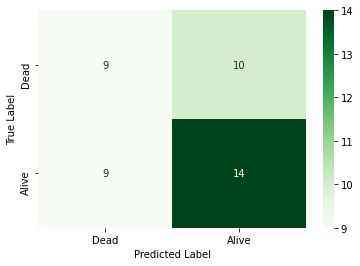

    Percentage  Accuracy    Scaler
37          48      0.67  Standard
6           32      0.67     Power
3           31      0.67  Standard
9           34      0.67  Standard
10          34      0.62     Power
11          35      0.62  Standard
5           32      0.62  Standard
4           31      0.62     Power
2           30      0.62     Power
7           33      0.60  Standard
23          41      0.60  Standard
15          37      0.60  Standard
1           30      0.57  Standard
12          35      0.57     Power
35          47      0.57  Standard
32          45      0.57     Power
25          42      0.55  Standard
38          48      0.55     Power
31          45      0.55  Standard
24          41      0.55     Power
26          42      0.52     Power
36          47      0.52     Power
19          39      0.52  Standard
21          40      0.52  Standard
20          39      0.52     Power
17          38      0.52  Standard
14          36      0.52     Power
13          36      

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 49
              precision    recall  f1-score   support

       Alive       0.45      0.50      0.48        20
        Dead       0.50      0.45      0.48        22

    accuracy                           0.48        42
   macro avg       0.48      0.48      0.48        42
weighted avg       0.48      0.48      0.48        42

Accuracy: 47.62%

 Confusion Matrix:


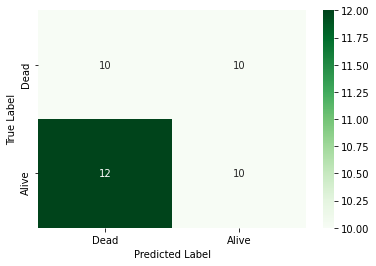

Percentage: 49
              precision    recall  f1-score   support

       Alive       0.42      0.50      0.45        20
        Dead       0.44      0.36      0.40        22

    accuracy                           0.43        42
   macro avg       0.43      0.43      0.43        42
weighted avg       0.43      0.43      0.43        42

Accuracy: 42.86%

 Confusion Matrix:


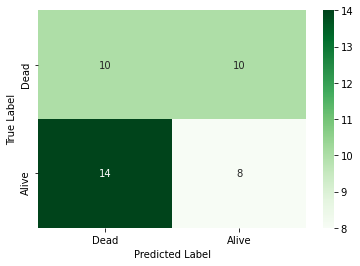

    Percentage  Accuracy    Scaler
3           31      0.67  Standard
6           32      0.67     Power
37          48      0.67  Standard
9           34      0.67  Standard
10          34      0.62     Power
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
11          35      0.62  Standard
7           33      0.60  Standard
23          41      0.60  Standard
15          37      0.60  Standard
32          45      0.57     Power
35          47      0.57  Standard
12          35      0.57     Power
1           30      0.57  Standard
31          45      0.55  Standard
38          48      0.55     Power
25          42      0.55  Standard
24          41      0.55     Power
26          42      0.52     Power
20          39      0.52     Power
21          40      0.52  Standard
19          39      0.52  Standard
36          47      0.52     Power
17          38      0.52  Standard
14          36      0.52     Power
13          36      

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 50
              precision    recall  f1-score   support

       Alive       0.55      0.57      0.56        21
        Dead       0.55      0.52      0.54        21

    accuracy                           0.55        42
   macro avg       0.55      0.55      0.55        42
weighted avg       0.55      0.55      0.55        42

Accuracy: 54.76%

 Confusion Matrix:


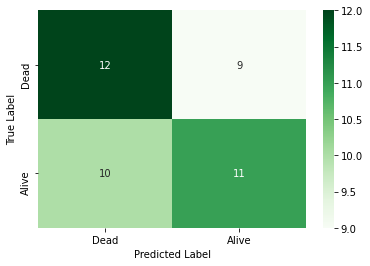

Percentage: 50
              precision    recall  f1-score   support

       Alive       0.45      0.48      0.47        21
        Dead       0.45      0.43      0.44        21

    accuracy                           0.45        42
   macro avg       0.45      0.45      0.45        42
weighted avg       0.45      0.45      0.45        42

Accuracy: 45.24%

 Confusion Matrix:


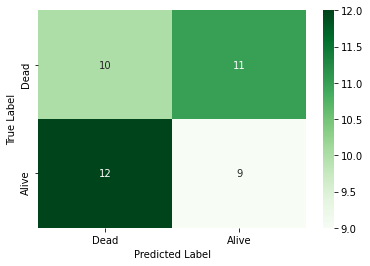

    Percentage  Accuracy    Scaler
9           34      0.67  Standard
6           32      0.67     Power
3           31      0.67  Standard
37          48      0.67  Standard
10          34      0.62     Power
11          35      0.62  Standard
5           32      0.62  Standard
4           31      0.62     Power
2           30      0.62     Power
7           33      0.60  Standard
23          41      0.60  Standard
15          37      0.60  Standard
12          35      0.57     Power
32          45      0.57     Power
1           30      0.57  Standard
35          47      0.57  Standard
25          42      0.55  Standard
24          41      0.55     Power
41          50      0.55  Standard
38          48      0.55     Power
31          45      0.55  Standard
26          42      0.52     Power
21          40      0.52  Standard
17          38      0.52  Standard
20          39      0.52     Power
19          39      0.52  Standard
14          36      0.52     Power
13          36      

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 51
              precision    recall  f1-score   support

       Alive       0.85      0.42      0.56        26
        Dead       0.48      0.88      0.62        16

    accuracy                           0.60        42
   macro avg       0.66      0.65      0.59        42
weighted avg       0.71      0.60      0.59        42

Accuracy: 59.52%

 Confusion Matrix:


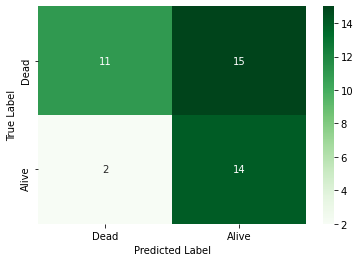

Percentage: 51
              precision    recall  f1-score   support

       Alive       0.80      0.31      0.44        26
        Dead       0.44      0.88      0.58        16

    accuracy                           0.52        42
   macro avg       0.62      0.59      0.51        42
weighted avg       0.66      0.52      0.50        42

Accuracy: 52.38%

 Confusion Matrix:


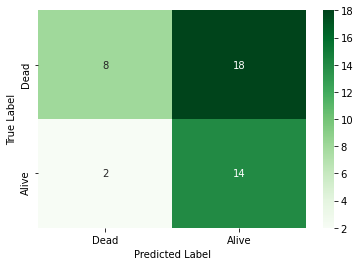

    Percentage  Accuracy    Scaler
37          48      0.67  Standard
3           31      0.67  Standard
6           32      0.67     Power
9           34      0.67  Standard
11          35      0.62  Standard
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
10          34      0.62     Power
43          51      0.60  Standard
15          37      0.60  Standard
23          41      0.60  Standard
7           33      0.60  Standard
35          47      0.57  Standard
32          45      0.57     Power
1           30      0.57  Standard
12          35      0.57     Power
24          41      0.55     Power
41          50      0.55  Standard
31          45      0.55  Standard
38          48      0.55     Power
25          42      0.55  Standard
36          47      0.52     Power
26          42      0.52     Power
44          51      0.52     Power
21          40      0.52  Standard
20          39      0.52     Power
17          38      

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 52
              precision    recall  f1-score   support

       Alive       0.65      0.54      0.59        24
        Dead       0.50      0.61      0.55        18

    accuracy                           0.57        42
   macro avg       0.57      0.58      0.57        42
weighted avg       0.59      0.57      0.57        42

Accuracy: 57.14%

 Confusion Matrix:


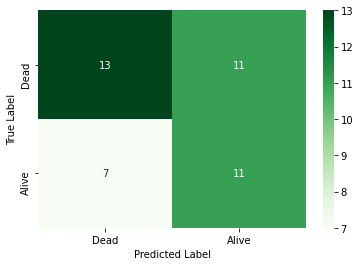

Percentage: 52
              precision    recall  f1-score   support

       Alive       0.58      0.46      0.51        24
        Dead       0.43      0.56      0.49        18

    accuracy                           0.50        42
   macro avg       0.51      0.51      0.50        42
weighted avg       0.52      0.50      0.50        42

Accuracy: 50.00%

 Confusion Matrix:


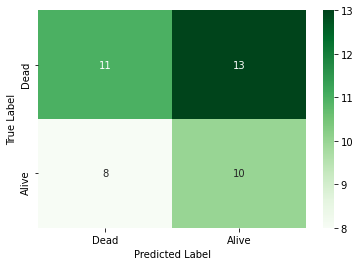

    Percentage  Accuracy    Scaler
37          48      0.67  Standard
3           31      0.67  Standard
6           32      0.67     Power
9           34      0.67  Standard
11          35      0.62  Standard
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
10          34      0.62     Power
43          51      0.60  Standard
15          37      0.60  Standard
23          41      0.60  Standard
7           33      0.60  Standard
12          35      0.57     Power
35          47      0.57  Standard
45          52      0.57  Standard
32          45      0.57     Power
1           30      0.57  Standard
41          50      0.55  Standard
38          48      0.55     Power
25          42      0.55  Standard
24          41      0.55     Power
31          45      0.55  Standard
21          40      0.52  Standard
20          39      0.52     Power
19          39      0.52  Standard
26          42      0.52     Power
17          38      

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 53
              precision    recall  f1-score   support

       Alive       0.59      0.48      0.53        21
        Dead       0.56      0.67      0.61        21

    accuracy                           0.57        42
   macro avg       0.57      0.57      0.57        42
weighted avg       0.57      0.57      0.57        42

Accuracy: 57.14%

 Confusion Matrix:


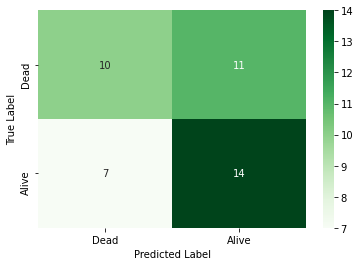

Percentage: 53
              precision    recall  f1-score   support

       Alive       0.59      0.48      0.53        21
        Dead       0.56      0.67      0.61        21

    accuracy                           0.57        42
   macro avg       0.57      0.57      0.57        42
weighted avg       0.57      0.57      0.57        42

Accuracy: 57.14%

 Confusion Matrix:


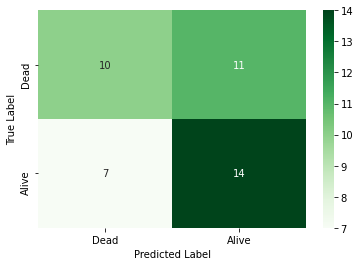

    Percentage  Accuracy    Scaler
3           31      0.67  Standard
6           32      0.67     Power
9           34      0.67  Standard
37          48      0.67  Standard
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
10          34      0.62     Power
11          35      0.62  Standard
23          41      0.60  Standard
15          37      0.60  Standard
7           33      0.60  Standard
43          51      0.60  Standard
32          45      0.57     Power
35          47      0.57  Standard
48          53      0.57     Power
45          52      0.57  Standard
1           30      0.57  Standard
47          53      0.57  Standard
12          35      0.57     Power
41          50      0.55  Standard
38          48      0.55     Power
31          45      0.55  Standard
25          42      0.55  Standard
24          41      0.55     Power
13          36      0.52  Standard
44          51      0.52     Power
14          36      

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 54
              precision    recall  f1-score   support

       Alive       0.67      0.80      0.73        20
        Dead       0.78      0.64      0.70        22

    accuracy                           0.71        42
   macro avg       0.72      0.72      0.71        42
weighted avg       0.72      0.71      0.71        42

Accuracy: 71.43%

 Confusion Matrix:


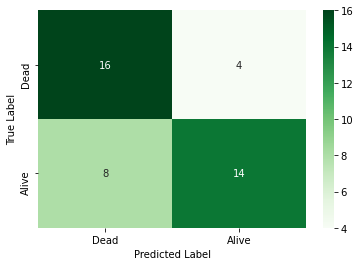

Percentage: 54
              precision    recall  f1-score   support

       Alive       0.62      0.75      0.68        20
        Dead       0.72      0.59      0.65        22

    accuracy                           0.67        42
   macro avg       0.67      0.67      0.67        42
weighted avg       0.68      0.67      0.67        42

Accuracy: 66.67%

 Confusion Matrix:


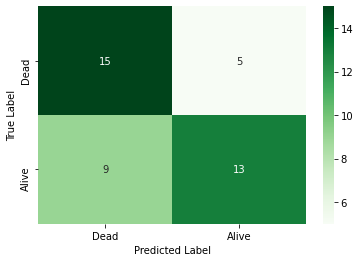

    Percentage  Accuracy    Scaler
49          54      0.71  Standard
6           32      0.67     Power
9           34      0.67  Standard
50          54      0.67     Power
3           31      0.67  Standard
37          48      0.67  Standard
4           31      0.62     Power
5           32      0.62  Standard
2           30      0.62     Power
10          34      0.62     Power
11          35      0.62  Standard
7           33      0.60  Standard
43          51      0.60  Standard
23          41      0.60  Standard
15          37      0.60  Standard
32          45      0.57     Power
35          47      0.57  Standard
12          35      0.57     Power
45          52      0.57  Standard
47          53      0.57  Standard
48          53      0.57     Power
1           30      0.57  Standard
41          50      0.55  Standard
38          48      0.55     Power
31          45      0.55  Standard
25          42      0.55  Standard
24          41      0.55     Power
26          42      

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 55
              precision    recall  f1-score   support

       Alive       0.50      0.59      0.54        22
        Dead       0.44      0.35      0.39        20

    accuracy                           0.48        42
   macro avg       0.47      0.47      0.47        42
weighted avg       0.47      0.48      0.47        42

Accuracy: 47.62%

 Confusion Matrix:


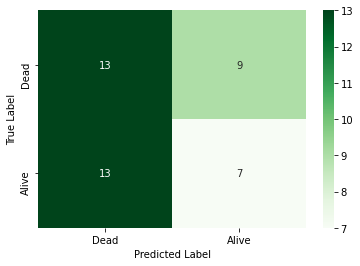

Percentage: 55
              precision    recall  f1-score   support

       Alive       0.52      0.64      0.57        22
        Dead       0.47      0.35      0.40        20

    accuracy                           0.50        42
   macro avg       0.49      0.49      0.49        42
weighted avg       0.49      0.50      0.49        42

Accuracy: 50.00%

 Confusion Matrix:


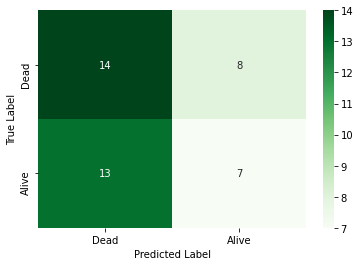

    Percentage  Accuracy    Scaler
49          54      0.71  Standard
6           32      0.67     Power
9           34      0.67  Standard
37          48      0.67  Standard
50          54      0.67     Power
3           31      0.67  Standard
5           32      0.62  Standard
4           31      0.62     Power
2           30      0.62     Power
10          34      0.62     Power
11          35      0.62  Standard
7           33      0.60  Standard
43          51      0.60  Standard
15          37      0.60  Standard
23          41      0.60  Standard
47          53      0.57  Standard
32          45      0.57     Power
48          53      0.57     Power
1           30      0.57  Standard
45          52      0.57  Standard
35          47      0.57  Standard
12          35      0.57     Power
25          42      0.55  Standard
24          41      0.55     Power
38          48      0.55     Power
31          45      0.55  Standard
41          50      0.55  Standard
44          51      

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 56
              precision    recall  f1-score   support

       Alive       0.55      0.60      0.57        20
        Dead       0.60      0.55      0.57        22

    accuracy                           0.57        42
   macro avg       0.57      0.57      0.57        42
weighted avg       0.57      0.57      0.57        42

Accuracy: 57.14%

 Confusion Matrix:


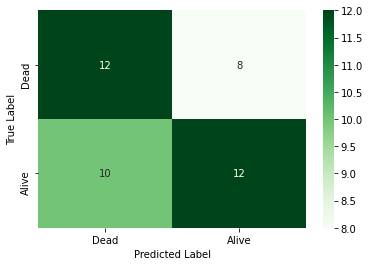

Percentage: 56
              precision    recall  f1-score   support

       Alive       0.52      0.55      0.54        20
        Dead       0.57      0.55      0.56        22

    accuracy                           0.55        42
   macro avg       0.55      0.55      0.55        42
weighted avg       0.55      0.55      0.55        42

Accuracy: 54.76%

 Confusion Matrix:


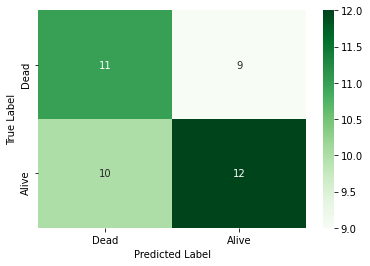

    Percentage  Accuracy    Scaler
49          54      0.71  Standard
50          54      0.67     Power
3           31      0.67  Standard
6           32      0.67     Power
9           34      0.67  Standard
37          48      0.67  Standard
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
10          34      0.62     Power
11          35      0.62  Standard
23          41      0.60  Standard
43          51      0.60  Standard
15          37      0.60  Standard
7           33      0.60  Standard
45          52      0.57  Standard
12          35      0.57     Power
35          47      0.57  Standard
47          53      0.57  Standard
53          56      0.57  Standard
48          53      0.57     Power
32          45      0.57     Power
1           30      0.57  Standard
41          50      0.55  Standard
38          48      0.55     Power
24          41      0.55     Power
25          42      0.55  Standard
31          45      

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 57
              precision    recall  f1-score   support

       Alive       0.47      0.47      0.47        19
        Dead       0.57      0.57      0.57        23

    accuracy                           0.52        42
   macro avg       0.52      0.52      0.52        42
weighted avg       0.52      0.52      0.52        42

Accuracy: 52.38%

 Confusion Matrix:


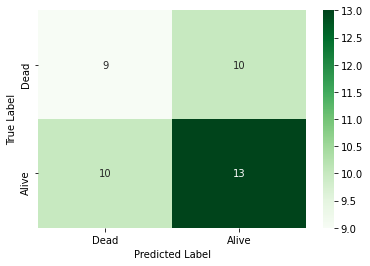

Percentage: 57
              precision    recall  f1-score   support

       Alive       0.52      0.58      0.55        19
        Dead       0.62      0.57      0.59        23

    accuracy                           0.57        42
   macro avg       0.57      0.57      0.57        42
weighted avg       0.58      0.57      0.57        42

Accuracy: 57.14%

 Confusion Matrix:


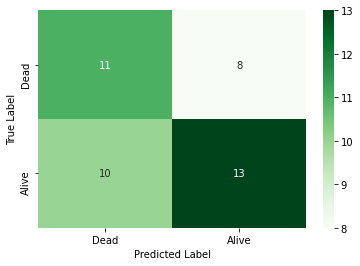

    Percentage  Accuracy    Scaler
49          54      0.71  Standard
9           34      0.67  Standard
3           31      0.67  Standard
6           32      0.67     Power
50          54      0.67     Power
37          48      0.67  Standard
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
10          34      0.62     Power
11          35      0.62  Standard
15          37      0.60  Standard
7           33      0.60  Standard
43          51      0.60  Standard
23          41      0.60  Standard
56          57      0.57     Power
1           30      0.57  Standard
35          47      0.57  Standard
53          56      0.57  Standard
47          53      0.57  Standard
45          52      0.57  Standard
32          45      0.57     Power
48          53      0.57     Power
12          35      0.57     Power
41          50      0.55  Standard
38          48      0.55     Power
24          41      0.55     Power
25          42      

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 58
              precision    recall  f1-score   support

       Alive       0.75      0.52      0.62        23
        Dead       0.58      0.79      0.67        19

    accuracy                           0.64        42
   macro avg       0.66      0.66      0.64        42
weighted avg       0.67      0.64      0.64        42

Accuracy: 64.29%

 Confusion Matrix:


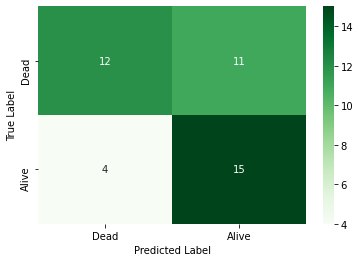

Percentage: 58
              precision    recall  f1-score   support

       Alive       0.75      0.52      0.62        23
        Dead       0.58      0.79      0.67        19

    accuracy                           0.64        42
   macro avg       0.66      0.66      0.64        42
weighted avg       0.67      0.64      0.64        42

Accuracy: 64.29%

 Confusion Matrix:


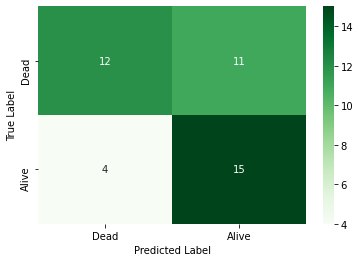

    Percentage  Accuracy    Scaler
49          54      0.71  Standard
3           31      0.67  Standard
6           32      0.67     Power
9           34      0.67  Standard
50          54      0.67     Power
37          48      0.67  Standard
58          58      0.64     Power
57          58      0.64  Standard
2           30      0.62     Power
4           31      0.62     Power
5           32      0.62  Standard
10          34      0.62     Power
11          35      0.62  Standard
15          37      0.60  Standard
43          51      0.60  Standard
23          41      0.60  Standard
7           33      0.60  Standard
1           30      0.57  Standard
45          52      0.57  Standard
12          35      0.57     Power
35          47      0.57  Standard
56          57      0.57     Power
47          53      0.57  Standard
32          45      0.57     Power
53          56      0.57  Standard
48          53      0.57     Power
54          56      0.55     Power
38          48      

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 59
              precision    recall  f1-score   support

       Alive       0.47      0.50      0.49        18
        Dead       0.61      0.58      0.60        24

    accuracy                           0.55        42
   macro avg       0.54      0.54      0.54        42
weighted avg       0.55      0.55      0.55        42

Accuracy: 54.76%

 Confusion Matrix:


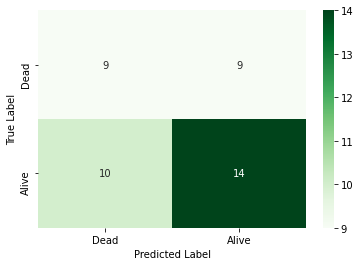

Percentage: 59
              precision    recall  f1-score   support

       Alive       0.50      0.61      0.55        18
        Dead       0.65      0.54      0.59        24

    accuracy                           0.57        42
   macro avg       0.57      0.58      0.57        42
weighted avg       0.59      0.57      0.57        42

Accuracy: 57.14%

 Confusion Matrix:


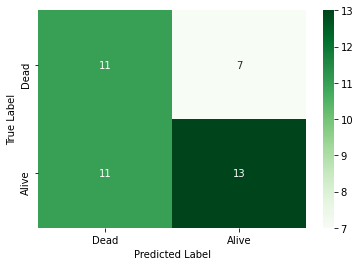

    Percentage  Accuracy    Scaler
49          54      0.71  Standard
9           34      0.67  Standard
37          48      0.67  Standard
3           31      0.67  Standard
50          54      0.67     Power
..         ...       ...       ...
30          44      0.43     Power
40          49      0.43     Power
33          46      0.43  Standard
28          43      0.43     Power
0            0      0.00       set

[61 rows x 3 columns]
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 60
              precision    recall  f1-score   support

       Alive       0.53      0.56      0.54        18
        Dead       0.65      0.62      0.64        24

    accuracy                           0.60        42
   macro avg       0.59      0.59      0.59        42
weighted avg       0.60      0.60      0.60        42

Accuracy: 59.52%

 Confusion Matrix:


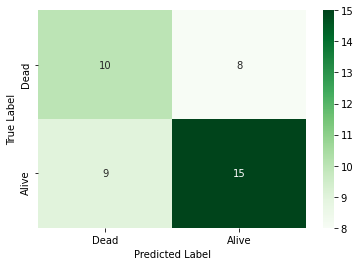

Percentage: 60
              precision    recall  f1-score   support

       Alive       0.52      0.67      0.59        18
        Dead       0.68      0.54      0.60        24

    accuracy                           0.60        42
   macro avg       0.60      0.60      0.60        42
weighted avg       0.61      0.60      0.60        42

Accuracy: 59.52%

 Confusion Matrix:


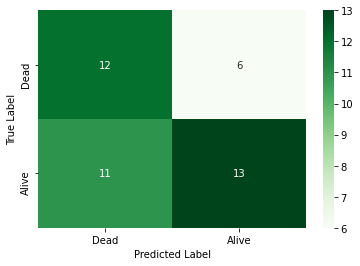

    Percentage  Accuracy    Scaler
49          54      0.71  Standard
3           31      0.67  Standard
6           32      0.67     Power
37          48      0.67  Standard
9           34      0.67  Standard
..         ...       ...       ...
33          46      0.43  Standard
28          43      0.43     Power
40          49      0.43     Power
30          44      0.43     Power
0            0      0.00       set

[63 rows x 3 columns]
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 61
              precision    recall  f1-score   support

       Alive       0.50      0.55      0.52        20
        Dead       0.55      0.50      0.52        22

    accuracy                           0.52        42
   macro avg       0.53      0.53      0.52        42
weighted avg       0.53      0.52      0.52        42

Accuracy: 52.38%

 Confusion Matrix:


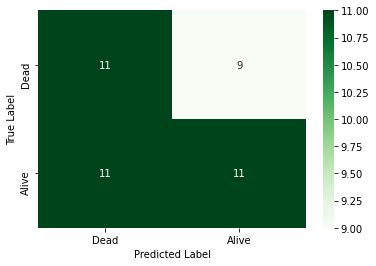

Percentage: 61
              precision    recall  f1-score   support

       Alive       0.41      0.45      0.43        20
        Dead       0.45      0.41      0.43        22

    accuracy                           0.43        42
   macro avg       0.43      0.43      0.43        42
weighted avg       0.43      0.43      0.43        42

Accuracy: 42.86%

 Confusion Matrix:


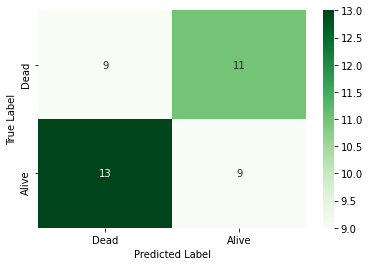

    Percentage  Accuracy    Scaler
49          54      0.71  Standard
9           34      0.67  Standard
37          48      0.67  Standard
3           31      0.67  Standard
50          54      0.67     Power
..         ...       ...       ...
40          49      0.43     Power
33          46      0.43  Standard
30          44      0.43     Power
28          43      0.43     Power
0            0      0.00       set

[65 rows x 3 columns]
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 62
              precision    recall  f1-score   support

       Alive       0.56      0.43      0.49        23
        Dead       0.46      0.58      0.51        19

    accuracy                           0.50        42
   macro avg       0.51      0.51      0.50        42
weighted avg       0.51      0.50      0.50        42

Accuracy: 50.00%

 Confusion Matrix:


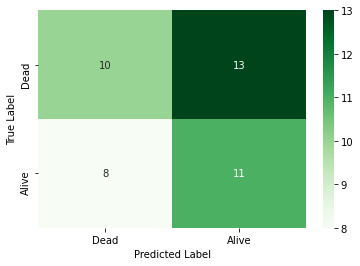

Percentage: 62
              precision    recall  f1-score   support

       Alive       0.53      0.35      0.42        23
        Dead       0.44      0.63      0.52        19

    accuracy                           0.48        42
   macro avg       0.49      0.49      0.47        42
weighted avg       0.49      0.48      0.47        42

Accuracy: 47.62%

 Confusion Matrix:


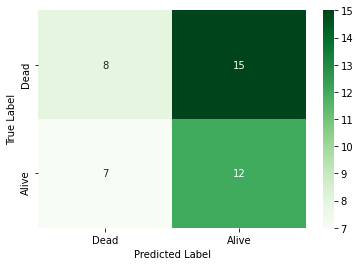

    Percentage  Accuracy    Scaler
49          54      0.71  Standard
50          54      0.67     Power
3           31      0.67  Standard
6           32      0.67     Power
37          48      0.67  Standard
..         ...       ...       ...
33          46      0.43  Standard
40          49      0.43     Power
30          44      0.43     Power
28          43      0.43     Power
0            0      0.00       set

[67 rows x 3 columns]
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 63
              precision    recall  f1-score   support

       Alive       0.58      0.55      0.56        20
        Dead       0.61      0.64      0.62        22

    accuracy                           0.60        42
   macro avg       0.59      0.59      0.59        42
weighted avg       0.59      0.60      0.59        42

Accuracy: 59.52%

 Confusion Matrix:


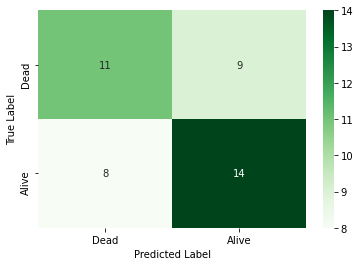

Percentage: 63
              precision    recall  f1-score   support

       Alive       0.60      0.60      0.60        20
        Dead       0.64      0.64      0.64        22

    accuracy                           0.62        42
   macro avg       0.62      0.62      0.62        42
weighted avg       0.62      0.62      0.62        42

Accuracy: 61.90%

 Confusion Matrix:


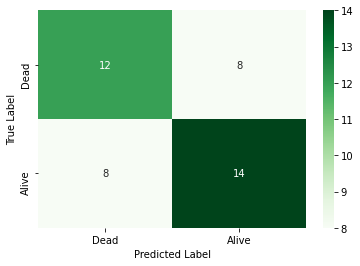

    Percentage  Accuracy    Scaler
49          54      0.71  Standard
50          54      0.67     Power
37          48      0.67  Standard
3           31      0.67  Standard
9           34      0.67  Standard
..         ...       ...       ...
33          46      0.43  Standard
64          61      0.43     Power
30          44      0.43     Power
28          43      0.43     Power
0            0      0.00       set

[69 rows x 3 columns]
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 64
              precision    recall  f1-score   support

       Alive       0.53      0.48      0.50        21
        Dead       0.52      0.57      0.55        21

    accuracy                           0.52        42
   macro avg       0.52      0.52      0.52        42
weighted avg       0.52      0.52      0.52        42

Accuracy: 52.38%

 Confusion Matrix:


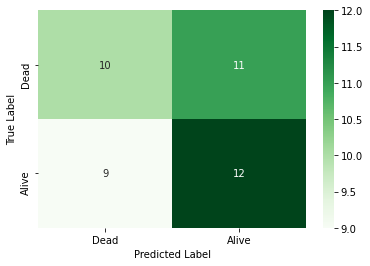

Percentage: 64
              precision    recall  f1-score   support

       Alive       0.55      0.57      0.56        21
        Dead       0.55      0.52      0.54        21

    accuracy                           0.55        42
   macro avg       0.55      0.55      0.55        42
weighted avg       0.55      0.55      0.55        42

Accuracy: 54.76%

 Confusion Matrix:


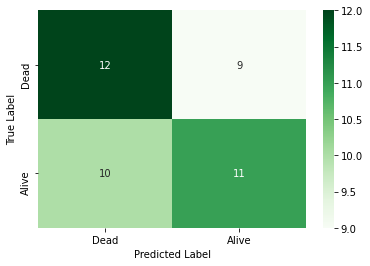

    Percentage  Accuracy    Scaler
49          54      0.71  Standard
6           32      0.67     Power
50          54      0.67     Power
9           34      0.67  Standard
37          48      0.67  Standard
..         ...       ...       ...
30          44      0.43     Power
64          61      0.43     Power
40          49      0.43     Power
28          43      0.43     Power
0            0      0.00       set

[71 rows x 3 columns]
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 65
              precision    recall  f1-score   support

       Alive       0.61      0.64      0.62        22
        Dead       0.58      0.55      0.56        20

    accuracy                           0.60        42
   macro avg       0.59      0.59      0.59        42
weighted avg       0.59      0.60      0.59        42

Accuracy: 59.52%

 Confusion Matrix:


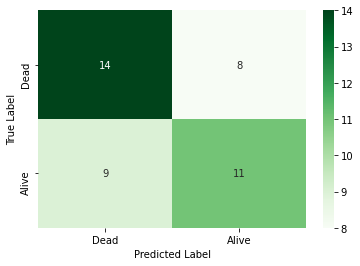

Percentage: 65
              precision    recall  f1-score   support

       Alive       0.59      0.59      0.59        22
        Dead       0.55      0.55      0.55        20

    accuracy                           0.57        42
   macro avg       0.57      0.57      0.57        42
weighted avg       0.57      0.57      0.57        42

Accuracy: 57.14%

 Confusion Matrix:


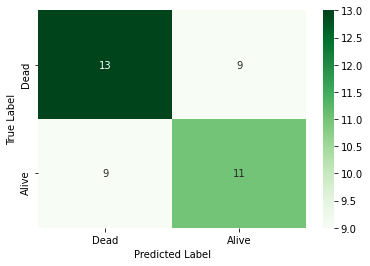

    Percentage  Accuracy    Scaler
49          54      0.71  Standard
9           34      0.67  Standard
3           31      0.67  Standard
50          54      0.67     Power
37          48      0.67  Standard
..         ...       ...       ...
28          43      0.43     Power
30          44      0.43     Power
33          46      0.43  Standard
40          49      0.43     Power
0            0      0.00       set

[73 rows x 3 columns]
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 66
              precision    recall  f1-score   support

       Alive       0.48      0.57      0.52        21
        Dead       0.47      0.38      0.42        21

    accuracy                           0.48        42
   macro avg       0.48      0.48      0.47        42
weighted avg       0.48      0.48      0.47        42

Accuracy: 47.62%

 Confusion Matrix:


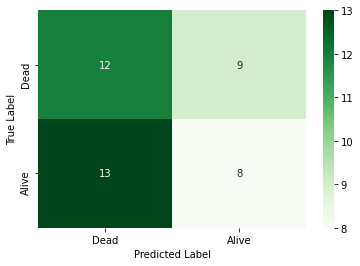

Percentage: 66
              precision    recall  f1-score   support

       Alive       0.46      0.62      0.53        21
        Dead       0.43      0.29      0.34        21

    accuracy                           0.45        42
   macro avg       0.45      0.45      0.44        42
weighted avg       0.45      0.45      0.44        42

Accuracy: 45.24%

 Confusion Matrix:


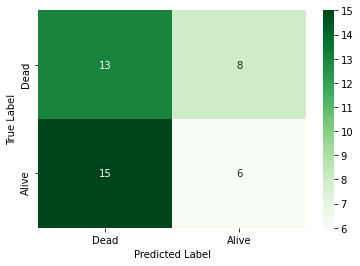

    Percentage  Accuracy    Scaler
49          54      0.71  Standard
37          48      0.67  Standard
50          54      0.67     Power
3           31      0.67  Standard
9           34      0.67  Standard
..         ...       ...       ...
40          49      0.43     Power
33          46      0.43  Standard
30          44      0.43     Power
28          43      0.43     Power
0            0      0.00       set

[75 rows x 3 columns]
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 67
              precision    recall  f1-score   support

       Alive       0.52      0.55      0.54        20
        Dead       0.57      0.55      0.56        22

    accuracy                           0.55        42
   macro avg       0.55      0.55      0.55        42
weighted avg       0.55      0.55      0.55        42

Accuracy: 54.76%

 Confusion Matrix:


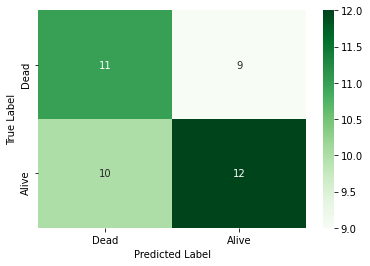

Percentage: 67
              precision    recall  f1-score   support

       Alive       0.52      0.55      0.54        20
        Dead       0.57      0.55      0.56        22

    accuracy                           0.55        42
   macro avg       0.55      0.55      0.55        42
weighted avg       0.55      0.55      0.55        42

Accuracy: 54.76%

 Confusion Matrix:


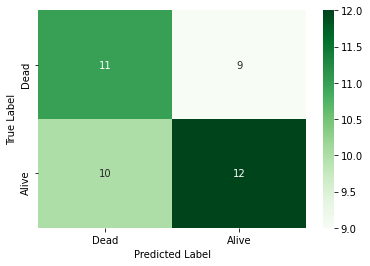

    Percentage  Accuracy    Scaler
49          54      0.71  Standard
50          54      0.67     Power
6           32      0.67     Power
9           34      0.67  Standard
37          48      0.67  Standard
..         ...       ...       ...
64          61      0.43     Power
28          43      0.43     Power
30          44      0.43     Power
33          46      0.43  Standard
0            0      0.00       set

[77 rows x 3 columns]
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 68
              precision    recall  f1-score   support

       Alive       0.59      0.54      0.57        24
        Dead       0.45      0.50      0.47        18

    accuracy                           0.52        42
   macro avg       0.52      0.52      0.52        42
weighted avg       0.53      0.52      0.53        42

Accuracy: 52.38%

 Confusion Matrix:


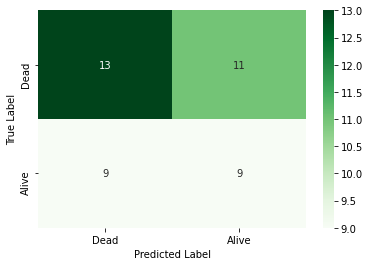

Percentage: 68
              precision    recall  f1-score   support

       Alive       0.59      0.54      0.57        24
        Dead       0.45      0.50      0.47        18

    accuracy                           0.52        42
   macro avg       0.52      0.52      0.52        42
weighted avg       0.53      0.52      0.53        42

Accuracy: 52.38%

 Confusion Matrix:


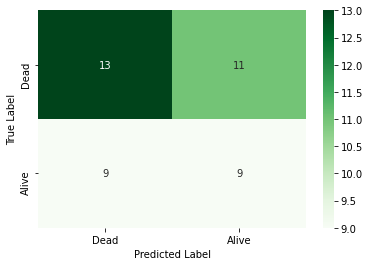

    Percentage  Accuracy    Scaler
49          54      0.71  Standard
37          48      0.67  Standard
3           31      0.67  Standard
50          54      0.67     Power
9           34      0.67  Standard
..         ...       ...       ...
40          49      0.43     Power
33          46      0.43  Standard
30          44      0.43     Power
28          43      0.43     Power
0            0      0.00       set

[79 rows x 3 columns]
Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:
Percentage: 69
              precision    recall  f1-score   support

       Alive       0.24      0.29      0.26        17
        Dead       0.43      0.36      0.39        25

    accuracy                           0.33        42
   macro avg       0.33      0.33      0.33        42
weighted avg       0.35      0.33      0.34        42

Accuracy: 33.33%

 Confusion Matrix:


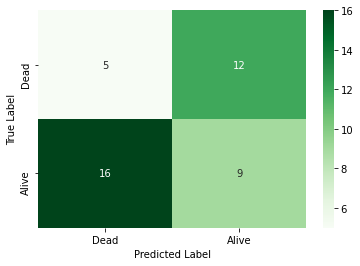

Percentage: 69
              precision    recall  f1-score   support

       Alive       0.25      0.35      0.29        17
        Dead       0.39      0.28      0.33        25

    accuracy                           0.31        42
   macro avg       0.32      0.32      0.31        42
weighted avg       0.33      0.31      0.31        42

Accuracy: 30.95%

 Confusion Matrix:


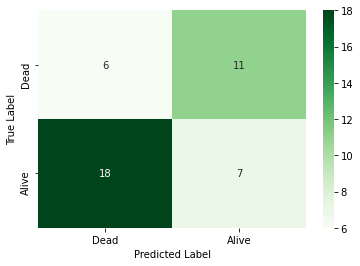

    Percentage  Accuracy    Scaler
49          54      0.71  Standard
3           31      0.67  Standard
37          48      0.67  Standard
50          54      0.67     Power
6           32      0.67     Power
..         ...       ...       ...
28          43      0.43     Power
40          49      0.43     Power
79          69      0.33  Standard
80          69      0.31     Power
0            0      0.00       set

[81 rows x 3 columns]


In [ ]:
# Libraries
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# The images are in a folder named 'shapes/training'
training_folder_name = 'Training'

percentage_df = pd.DataFrame({'Percentage':[0],'Accuracy':[0],'Scaler':['set']})

for percent in range(30,61,1):
  features, labels, classnames = prep_data(training_folder_name,percent)
  X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.3)

  # Convert the training features to floats so they can be scaled
  X_train_float = X_train.astype('float64')

  # Our pipeline performs two tasks:
  #   1. Normalize the image arrays
  #   2. Train a classification model
  img_pipeline_bell = Pipeline([('norm', StandardScaler()),
                                ('classify', LogisticRegression(max_iter=1000))
                                ])
  img_pipeline_log = Pipeline([('norm', PowerTransformer()),
                               ('classify', LogisticRegression(max_iter=1000))
                               ])

  # Use the pipeline to fit a model to the training data
  print("Training model...")
  clf_bell = img_pipeline_bell.fit(X_train_float, Y_train)
  clf_log = img_pipeline_log.fit(X_train_float, Y_train)


  print('Classifier Metrics:')
  predictions_bell = clf_bell.predict(X_test)
  predictions_log = clf_log.predict(X_test)

  # Doing plotting for bell
  print('Percentage: {}'.format(percent))
  print(metrics.classification_report(Y_test, predictions_bell, target_names=classnames))
  print('Accuracy: {:.2%}'.format(metrics.accuracy_score(Y_test, predictions_bell)))

  print("\n Confusion Matrix:")
  cm = confusion_matrix(Y_test, np.round(predictions_bell, 0))
  # Plot confusion matrix as heatmap
  LABELS = ['Dead', 'Alive']
  sns.heatmap(cm, xticklabels=LABELS,
  yticklabels=LABELS, annot=True, fmt='d',cmap="Greens")
  #plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

  # Doing plotting for log
  print('Percentage: {}'.format(percent))
  print(metrics.classification_report(Y_test, predictions_log, target_names=classnames))
  print('Accuracy: {:.2%}'.format(metrics.accuracy_score(Y_test, predictions_log)))

  print("\n Confusion Matrix:")
  cm = confusion_matrix(Y_test, np.round(predictions_log, 0))
  # Plot confusion matrix as heatmap
  LABELS = ['Dead', 'Alive']
  sns.heatmap(cm, xticklabels=LABELS,
  yticklabels=LABELS, annot=True, fmt='d',cmap="Greens")
  #plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

  # Makind DF
  percentage_df = percentage_df.append({'Percentage':percent,'Accuracy':round(metrics.accuracy_score(Y_test, predictions_bell),2),'Scaler':'Standard'},ignore_index=True)
  percentage_df = percentage_df.append({'Percentage':percent,'Accuracy':round(metrics.accuracy_score(Y_test, predictions_log),2),'Scaler':'Power'},ignore_index=True)
  print(percentage_df.sort_values(by=['Accuracy','Percentage'],ascending=False).head(5))


In [ ]:
percentage_df.sort_values(by=['Accuracy','Percentage'],ascending=False).head(5)

NameError: ignored

We can see that for the percentage values 32,34,48,54 we got the best Accuracy. By going for the higer values we can assure that the model has more features to learn and tweak the model.

# <u>Iterating over random state</u>
Next we will iterate over the random states since depending where we start we might be landeing in a local minumum.

In [ ]:
# At the beginning I also used The desicion tree but after the second iteration I saw that it was always last so I droped it since it was also not so fast

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

# The images are in a folder named 'shapes/training'
training_folder_name = 'Training'

seed_df = pd.DataFrame({'Accuracy':[0],'Scaler':['set'],'Seed':[0]})


for rd_state in range(200,800,1):  
  features, labels, classnames = prep_data(training_folder_name,54)
  X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.3, random_state=25)

  # Convert the training features to floats so they can be scaled
  X_train_float = X_train.astype('float64')

  # Using different pipelines with diffrent pre processing steps and classifiers with different states:
  
  img_pipeline_bell_log = Pipeline([('norm', StandardScaler()),
                                ('classify', LogisticRegression(max_iter=1000,random_state=rd_state))
                                ])
  img_pipeline_log_log = Pipeline([('norm', PowerTransformer()),
                              ('classify', LogisticRegression(max_iter=1000,random_state=rd_state))
                              ])
  img_pipeline_mm_log = Pipeline([('norm', MinMaxScaler()),
                              ('classify', LogisticRegression(max_iter=1000,random_state=rd_state))
                              ])
  img_pipeline_bell_NB = Pipeline([('norm', StandardScaler()),
                                ('classify', GaussianNB())
                                ])
  img_pipeline_log_NB = Pipeline([('norm', PowerTransformer()),
                              ('classify', GaussianNB())
                              ])
  img_pipeline_mm_NB = Pipeline([('norm', MinMaxScaler()),
                              ('classify', GaussianNB())
                              ])

  # Use the pipeline to fit a model to the training data
  print("Training model...")
  clf_bell_log = img_pipeline_bell_log.fit(X_train_float, Y_train)
  clf_log_log = img_pipeline_log_log.fit(X_train_float, Y_train)
  clf_mm_log = img_pipeline_mm_log.fit(X_train_float, Y_train)
  clf_mm_NB = img_pipeline_mm_NB.fit(X_train_float, Y_train)
  clf_bell_NB = img_pipeline_bell_NB.fit(X_train_float, Y_train)
  clf_log_NB = img_pipeline_log_NB.fit(X_train_float, Y_train)

  print('Classifier Metrics:')
  predictions_bell_log = clf_bell_log.predict(X_test)
  predictions_log_log = clf_log_log.predict(X_test)
  predictions_mm_log = clf_mm_log.predict(X_test)
  predictions_bell_NB = clf_bell_NB.predict(X_test)
  predictions_log_NB = clf_log_NB.predict(X_test)
  predictions_mm_NB = clf_mm_NB.predict(X_test)

  # Makind DF
  seed_df = seed_df.append({'Accuracy':round(metrics.accuracy_score(Y_test, predictions_bell_log),2),'Scaler':'Standard_Log','Seed':rd_state},ignore_index=True)
  seed_df = seed_df.append({'Accuracy':round(metrics.accuracy_score(Y_test, predictions_log_log),2),'Scaler':'Power_Log','Seed':rd_state},ignore_index=True)
  seed_df = seed_df.append({'Accuracy':round(metrics.accuracy_score(Y_test, predictions_mm_log),2),'Scaler':'MinMax_Log','Seed':rd_state},ignore_index=True)
  seed_df = seed_df.append({'Accuracy':round(metrics.accuracy_score(Y_test, predictions_bell_NB),2),'Scaler':'Standard_NB','Seed':rd_state},ignore_index=True)
  seed_df = seed_df.append({'Accuracy':round(metrics.accuracy_score(Y_test, predictions_log_NB),2),'Scaler':'Power_NB','Seed':rd_state},ignore_index=True)
  seed_df = seed_df.append({'Accuracy':round(metrics.accuracy_score(Y_test, predictions_mm_NB),2),'Scaler':'MinMax_NB','Seed':rd_state},ignore_index=True)
  # Printing of the df
  print(seed_df.sort_values(by=['Accuracy'],ascending=False))
  print()
  print('We are currently at percent {} and with random_state {}'.format(percent,rd_state))
    


Reading data from Alive
Reading data from Dead
Training model...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Classifier Metrics:


KeyError: ignored

In [ ]:
seed_df.sort_values(by=['Accuracy','Percentage'],ascending=False)

NameError: ignored

In [ ]:
while True:pass

- <u>For activation function INTER_AREA</u>: The best percentage is given by 31 together with first standardizing the input and then use a Logistic Regression on it with seed 57. Given these steps we manage to get an accuracy of **76%**. To get this result back we will fix aswell the train test split.
- <u>For activation function INTER_NEAREST</u>: The best percentage is given by 48 together with first standardizing the input or min max transformation and then use a Gaussian Naive Bayes on it with seed 58 or 56. Given these steps we manage to get an accuracy of **71%**. To get this result back we will fix aswell the train test split.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
%matplotlib inline

# The images are in a folder named 'shapes/training'
training_folder_name = 'Training'

seed_train_df = pd.DataFrame({'Accuracy':[0],'Classifier':['0'],'Seed':[0]})

for rdm_state in range(640,1250,1):

  features, labels, classnames = prep_data(training_folder_name,48)
  X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.3, random_state=rdm_state)

  # Convert the training features to floats so they can be scaled
  X_train_float = X_train.astype('float64')
  X_test_float = X_test.astype('float64')
  # Using different pipelines with diffrent pre processing steps and classifiers with different states:

  img_pipeline_bell_log = Pipeline([('norm', StandardScaler()),
                                    ('classify', LogisticRegression(max_iter=1000,random_state=57))
                                    ])
  img_pipeline_bell_NB = Pipeline([('norm', StandardScaler()),
                                ('classify', GaussianNB())
                                ])
  img_pipeline_mm_NB = Pipeline([('norm', MinMaxScaler()),
                              ('classify', GaussianNB())])


  # Use the pipeline to fit a model to the training data
  print("Training model...")

  clf_bell_log = img_pipeline_bell_log.fit(X_train_float, Y_train)
  clf_bell_NB = img_pipeline_bell_NB.fit(X_train_float, Y_train)
  clf_mm_NB = img_pipeline_mm_NB.fit(X_train_float, Y_train)


  print('Classifier Metrics:')
  predictions_bell_log = clf_bell_log.predict(X_test)
  predictions_bell_NB = clf_bell_NB.predict(X_test_float)
  predictions_mm_NB = clf_mm_NB.predict(X_test_float)

  seed_train_df = seed_train_df.append({'Accuracy':round(metrics.accuracy_score(Y_test, predictions_bell_log),2),'Classifier':'Norm_Log','Seed':rdm_state},ignore_index=True)
  seed_train_df = seed_train_df.append({'Accuracy':round(metrics.accuracy_score(Y_test, predictions_bell_NB),2),'Classifier':'Norm_NB','Seed':rdm_state},ignore_index=True)
  seed_train_df = seed_train_df.append({'Accuracy':round(metrics.accuracy_score(Y_test, predictions_mm_NB),2),'Classifier':'MM_NB','Seed':rdm_state},ignore_index=True)
  
  print(seed_train_df.sort_values(by=['Accuracy'],ascending=False))

Streaming output truncated to the last 5000 lines.
     Accuracy Classifier  Seed
86       0.79    Norm_NB   668
87       0.79      MM_NB   668
27       0.79      MM_NB   648
26       0.79    Norm_NB   648
75       0.79      MM_NB   664
..        ...        ...   ...
220      0.40   Norm_Log   713
292      0.40   Norm_Log   737
13       0.38   Norm_Log   644
64       0.38   Norm_Log   661
0        0.00          0     0

[1000 rows x 3 columns]
Reading data from Alive
Reading data from Dead
Training model...
Classifier Metrics:
     Accuracy Classifier  Seed
86       0.79    Norm_NB   668
75       0.79      MM_NB   664
74       0.79    Norm_NB   664
87       0.79      MM_NB   668
27       0.79      MM_NB   648
..        ...        ...   ...
220      0.40   Norm_Log   713
815      0.40    Norm_NB   911
64       0.38   Norm_Log   661
13       0.38   Norm_Log   644
0        0.00          0     0

[1003 rows x 3 columns]
Reading data from Alive
Reading data from Dead
Training model...
Class

In [ ]:
seed_train_df.sort_values(by=['Accuracy','Seed'],ascending=False)

,Accuracy,Classifier,Seed
86,0.79,Norm_NB,668
87,0.79,MM_NB,668
74,0.79,Norm_NB,664
75,0.79,MM_NB,664
26,0.79,Norm_NB,648
...,...,...,...
13,0.38,Norm_Log,644
1124,0.36,Norm_NB,1014
1125,0.36,MM_NB,1014
1414,0.24,Norm_Log,1111


Reading data from Alive
Reading data from Dead
Training model...
Classifier Metrics:
              precision    recall  f1-score   support

       Alive       0.78      0.88      0.82        24
        Dead       0.80      0.67      0.73        18

    accuracy                           0.79        42
   macro avg       0.79      0.77      0.78        42
weighted avg       0.79      0.79      0.78        42

Accuracy: 78.57%

 Confusion Matrix:


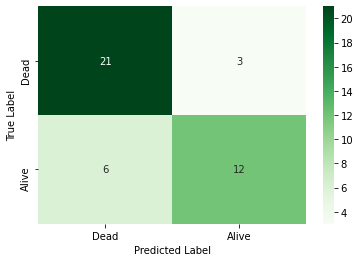

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
%matplotlib inline

# The images are in a folder named 'shapes/training'
training_folder_name = 'Training'

features, labels, classnames = prep_data(training_folder_name,48)
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.3, random_state=668)

# Convert the training features to floats so they can be scaled
X_train_float = X_train.astype('float64')
X_test_float = X_test.astype('float64')
# Using different pipelines with diffrent pre processing steps and classifiers with different states:

img_pipeline_bell_NB = Pipeline([('norm', StandardScaler()),
                              ('classify', GaussianNB())
                              ])

# Use the pipeline to fit a model to the training data
print("Training model...")

clf_bell_NB = img_pipeline_bell_NB.fit(X_train_float, Y_train)


print('Classifier Metrics:')
predictions_bell_NB = clf_bell_NB.predict(X_test_float)

# Doing plotting for bell and log
print(metrics.classification_report(Y_test, predictions_bell_NB, target_names=classnames))
print('Accuracy: {:.2%}'.format(metrics.accuracy_score(Y_test, predictions_bell_NB)))

print("\n Confusion Matrix:")
cm = confusion_matrix(Y_test, np.round(predictions_bell_NB, 0))
# Plot confusion matrix as heatmap
LABELS = ['Dead', 'Alive']
sns.heatmap(cm, xticklabels=LABELS,
yticklabels=LABELS, annot=True, fmt='d',cmap="Greens")
#plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



# <u>Best result that I got using as activation function INTER_AREA</u>
When using the activation function INTER_AREA I managed to get an accuracy of 81%

In [ ]:
def prep_data (folder,percent):
    # iterate through folders, assembling feature, label, and classname data objects
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    import cv2
    import math

    class_id = 0
    features = []
    labels = np.array([])
    classnames = []
    for root, dirs, filenames in os.walk(folder):
        for d in sorted(dirs):
            print("Reading data from", d)
            # use the folder name as the class name for this label
            classnames.append(d)
            files = os.listdir(os.path.join(root,d))
            for f in files:
                # Load the image file
                imgFile = os.path.join(root,d, f)
                img = plt.imread(imgFile)
                scale_percent = percent # percent of original size
                width = int(img.shape[1] * scale_percent / 100)
                height = int(img.shape[0] * scale_percent / 100)
                dim = (width, height)
                # resize image
                resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
                #sobel edge detection
                sobelx = cv2.Sobel(resized,cv2.CV_64F,1,0,ksize=5)
                sobely = cv2.Sobel(resized,cv2.CV_64F,0,1,ksize=5)
                #print(sobelx.type)
                #magniture
                sobel=np.sqrt(np.multiply(sobelx,sobelx)+np.multiply(sobely,sobely))
                vis = np.concatenate((resized, sobel), axis=0)

                # The image array is a multidimensional numpy array
                # - flatten it to a single array of pixel values for scikit-learn
                # - and add it to the list of features
                #features.append(vis.ravel())
                features.append(sobel.ravel())
                
                # Add it to the numpy array of labels
                labels = np.append(labels, class_id )
            class_id  += 1
            
    # Convert the list of features into a numpy array
    features = np.array(features)
    
    return features, labels, classnames


# The images are in a folder named 'shapes/training'
training_folder_name = 'Training'

# Prepare the image data
features, labels, classnames = prep_data(training_folder_name,60)
print(len(features), 'features')
print(len(labels), 'labels')
print(len(classnames), 'classes:', classnames)

Reading data from Alive
Reading data from Dead
140 features
140 labels
2 classes: ['Alive', 'Dead']


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
%matplotlib inline

# The images are in a folder named 'shapes/training'
training_folder_name = 'Training'

seed_train_df = pd.DataFrame({'Accuracy':[0],'Classifier':['0'],'C':[0],'Seed':[0]})

for rdm_state in range(150,1150,1):
  for C in [0.01,0.001,0.0001]:

    features, labels, classnames = prep_data(training_folder_name,31)
    X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.3, random_state=rdm_state)

    # Convert the training features to floats so they can be scaled
    X_train_float = X_train.astype('float64')
    # Using different pipelines with diffrent pre processing steps and classifiers with different states:

    img_pipeline_bell_log = Pipeline([('norm', StandardScaler()),
                                      ('classify', LogisticRegression(max_iter=1000,random_state=57,C=C))
                                      ])
    img_pipeline_bell_NB = Pipeline([('norm', StandardScaler()),
                                  ('classify', GaussianNB())
                                  ])
    img_pipeline_mm_NB = Pipeline([('norm', MinMaxScaler()),
                                ('classify', GaussianNB())])


    # Use the pipeline to fit a model to the training data
    print("Training model...")

    clf_bell_log = img_pipeline_bell_log.fit(X_train_float, Y_train)
    clf_bell_NB = img_pipeline_bell_NB.fit(X_train_float, Y_train)
    clf_mm_NB = img_pipeline_mm_NB.fit(X_train_float, Y_train)


    print('Classifier Metrics:')
    predictions_bell_log = clf_bell_log.predict(X_test)
    predictions_bell_NB = clf_bell_NB.predict(X_test)
    predictions_mm_NB = clf_mm_NB.predict(X_test)

    seed_train_df = seed_train_df.append({'Accuracy':round(metrics.accuracy_score(Y_test, predictions_bell_log),2),'Classifier':'Norm_Log','C':C,'Seed':rdm_state},ignore_index=True)
    seed_train_df = seed_train_df.append({'Accuracy':round(metrics.accuracy_score(Y_test, predictions_bell_NB),2),'Classifier':'Norm_NB','C':C,'Seed':rdm_state},ignore_index=True)
    seed_train_df = seed_train_df.append({'Accuracy':round(metrics.accuracy_score(Y_test, predictions_mm_NB),2),'Classifier':'MM_NB','C':C,'Seed':rdm_state},ignore_index=True)

    print(seed_train_df.sort_values(by=['Accuracy'],ascending=False))

Streaming output truncated to the last 5000 lines.
      Accuracy Classifier       C  Seed
6212      0.81    Norm_NB  0.0100   840
6213      0.81      MM_NB  0.0100   840
6215      0.81    Norm_NB  0.0010   840
6216      0.81      MM_NB  0.0010   840
6218      0.81    Norm_NB  0.0001   840
...        ...        ...     ...   ...
2043      0.33      MM_NB  0.0001   376
2042      0.33    Norm_NB  0.0001   376
2040      0.33      MM_NB  0.0010   376
2039      0.33    Norm_NB  0.0010   376
0         0.00          0  0.0000     0

[8170 rows x 4 columns]
Reading data from Alive
Reading data from Dead
Training model...
Classifier Metrics:
      Accuracy Classifier       C  Seed
6215      0.81    Norm_NB  0.0010   840
6216      0.81      MM_NB  0.0010   840
6218      0.81    Norm_NB  0.0001   840
6219      0.81      MM_NB  0.0001   840
6213      0.81      MM_NB  0.0100   840
...        ...        ...     ...   ...
2040      0.33      MM_NB  0.0010   376
2039      0.33    Norm_NB  0.0010   376

In [ ]:
seed_train_df.sort_values(by=['Accuracy','Classifier','Seed'],ascending=False).head(10)

,Accuracy,Classifier,C,Seed
6212,0.81,Norm_NB,0.0100,840
6215,0.81,Norm_NB,0.0010,840
6218,0.81,Norm_NB,0.0001,840
43,0.81,Norm_Log,0.0001,154
6213,0.81,MM_NB,0.0100,840
6216,0.81,MM_NB,0.0010,840
6219,0.81,MM_NB,0.0001,840
7193,0.79,Norm_NB,0.0100,949
7196,0.79,Norm_NB,0.0010,949
7199,0.79,Norm_NB,0.0001,949


We can see that **the seed 840 appears 5 times in the top 5** we get an accuracy of **81%** for Gaussian Naive Bayes. 

Reading data from Alive
Reading data from Dead
Training model...
Classifier Metrics:
              precision    recall  f1-score   support

       Alive       0.80      0.87      0.83        23
        Dead       0.82      0.74      0.78        19

    accuracy                           0.81        42
   macro avg       0.81      0.80      0.81        42
weighted avg       0.81      0.81      0.81        42

Accuracy: 80.95%

 Confusion Matrix:


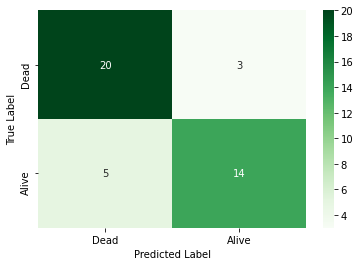

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# The images are in a folder named 'shapes/training'
training_folder_name = 'Training'


features, labels, classnames = prep_data(training_folder_name,31)
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.3, random_state=154)

# Convert the training features to floats so they can be scaled
X_train_float = X_train.astype('float64')

# Using different pipelines with diffrent pre processing steps and classifiers with different states:

img_pipeline_bell_log = Pipeline([('norm', StandardScaler()),
                                  ('classify', LogisticRegression(max_iter=1000,random_state=57,C=0.0001))
                                  ])


# Use the pipeline to fit a model to the training data
print("Training model...")
clf_bell_log = img_pipeline_bell_log.fit(X_train_float, Y_train)

print('Classifier Metrics:')
predictions_bell_log = clf_bell_log.predict(X_test)


# Doing plotting for bell and log
print(metrics.classification_report(Y_test, predictions_bell_log, target_names=classnames))
print('Accuracy: {:.2%}'.format(metrics.accuracy_score(Y_test, predictions_bell_log)))

print("\n Confusion Matrix:")
cm = confusion_matrix(Y_test, np.round(predictions_bell_log, 0))
# Plot confusion matrix as heatmap
LABELS = ['Dead', 'Alive']
sns.heatmap(cm, xticklabels=LABELS,
yticklabels=LABELS, annot=True, fmt='d',cmap="Greens")
#plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
print('Feature Shape:',features.shape)
print('Labels Shape:',labels.shape)

Feature Shape: (140, 34615)
Labels Shape: (140,)


In [ ]:
# Save the trained model
import sys
import os
import pickle

print ("Exporting the model")
file_stream = open('shape_classifier.pkl', 'wb')
pickle.dump(clf_bell_log, file_stream)
file_stream.close()

Exporting the model


In [ ]:
# Helper function to resize image
def resize_image(src_img, size=(128,128), bg_color="white"): 
    from PIL import Image

    # rescale the image so the longest edge is the right size
    src_img.thumbnail(size, Image.ANTIALIAS)
    
    # Create a new image of the right shape
    new_image = Image.new("L", size, bg_color)
    
    # Paste the rescaled image onto the new background
    new_image.paste(src_img, (int((size[0] - src_img.size[0]) / 2), int((size[1] - src_img.size[1]) / 2)))
  
    # return the resized image
    return new_image

# Function to predict the class of an image
def predict_image(classifier, image_array):
    import numpy as np
    
    # These are the classes our model can predict
    classnames = ['alive', 'dead']
    
    # Predict the class of each input image
    predictions = classifier.predict(image_array)
    
    predicted_classes = []
    for prediction in predictions:
        # And append the corresponding class name to the results
        predicted_classes.append(classnames[int(prediction)])
    # Return the predictions
    return predicted_classes

print("Functions created - ready to use model for inference.")

Functions created - ready to use model for inference.


Importing the model


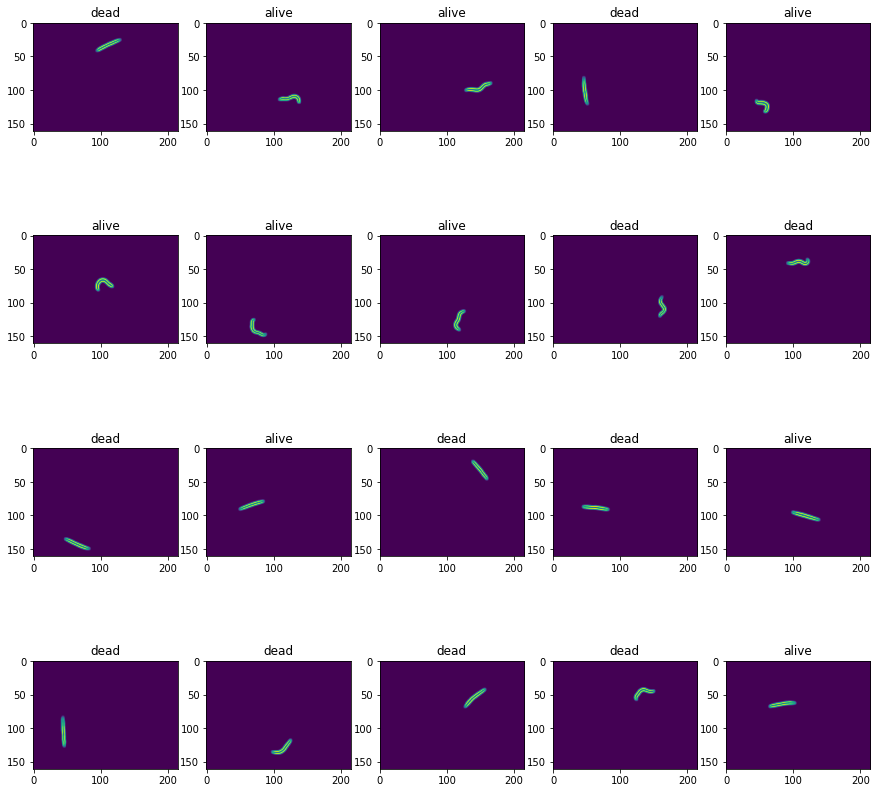

In [ ]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

# Load the model
print("Importing the model")
file_stream = open('shape_classifier.pkl', 'rb')
clf = pickle.load(file_stream)
file_stream.close()

#get the list of test image files
test_folder = 'Test'
test_image_files = os.listdir(test_folder)

# Empty array on which to store the images
image_arrays = []

size = (696,520)    
background_color = "white"        

fig = plt.figure(figsize=(15, 15))

# Get the images and show the predicted classes
for file_idx in range(len(test_image_files)):
    img = Image.open(os.path.join(test_folder, test_image_files[file_idx]))
    
    # resize the image so it matches the training set - it  must be the same size as the images on which the model was trained
    resized_img = np.array(resize_image(img, size, background_color))
    
    img_shape = np.array(resized_img).shape
    scale_percent = 31 # percent of original size
    width = int(resized_img.shape[1] * scale_percent / 100)
    height = int(resized_img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(resized_img, dim, interpolation = cv2.INTER_AREA)
    #sobel edge detection
    sobelx = cv2.Sobel(resized,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(resized,cv2.CV_64F,0,1,ksize=5)
    #print(sobelx.type)
    #magniture
    sobel=np.sqrt(np.multiply(sobelx,sobelx)+np.multiply(sobely,sobely))
    vis = np.concatenate((resized, sobel), axis=0)
    vis_shape=np.array(vis).shape
    # The image array is a multidimensional numpy array
    # - flatten it to a single array of pixel values for scikit-learn
    # - and add it to the list of features
    image_arrays.append(sobel.ravel())
    # Add the image to the array of images
    #image_arrays.append(resized_img.ravel())

# Get predictions from the array of image arrays
# Note that the model expects an array of 1 or more images - just like the batches on which it was trained
predictions = predict_image(clf, np.array(image_arrays))

n = 4
m = 5
for idx in range(len(predictions)):
    a=fig.add_subplot(n,m,idx+1)
    img = image_arrays[idx].reshape((161,215)).astype(int)
    imgplot = plt.imshow(img.astype(int))
    a.set_title(predictions[idx])
